**MNSIT Handwritten Digit Classification using Deep Learning**

In [2]:
#importing the Dependencies

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



Loading the mnist data from keras datasets

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
#shape of numpy array

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
#printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


2


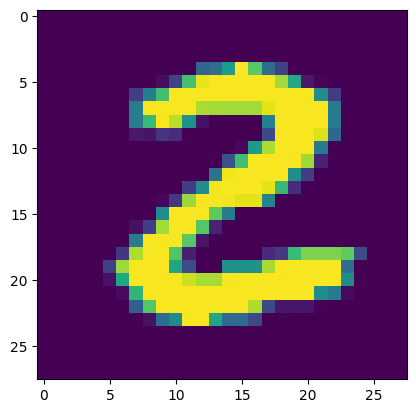

In [10]:
# displaying the image
plt.imshow(X_train[25])
plt.show

#print the corresponding label

print(Y_train[25])

In [11]:
#image label

print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [12]:
#unique values in Y_train

print(np.unique(Y_train))

#unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use labels as suchh or we can also apply One hot encoding

All the Images have the same dimesnion in the dataset ,if not ,we have to resize all the images to a common dimension

In [13]:
#scaling the values

X_train = X_train/255
X_test = X_test/255




In [14]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [16]:
# building the neural network

# setting up the layer of the neural network

model = keras.Sequential([
                        keras.layers.Flatten(input_shape = (28,28)),
                        keras.layers.Dense(50,activation= 'relu'),
                        keras.layers.Dense(50,activation= 'relu'),
                        keras.layers.Dense(10,activation= 'sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# compiling the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [18]:
#training the neural n/w

model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8460 - loss: 0.5291
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9531 - loss: 0.1569
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9661 - loss: 0.1133
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9724 - loss: 0.0894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9780 - loss: 0.0737
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0526
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0450
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0384
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9903 - loss: 0.0333


training data accuracy - 99.03%

In [19]:
#accuracy on test data

loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9649 - loss: 0.1404
0.9695000052452087


test data accuracy - 96.95%

In [20]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

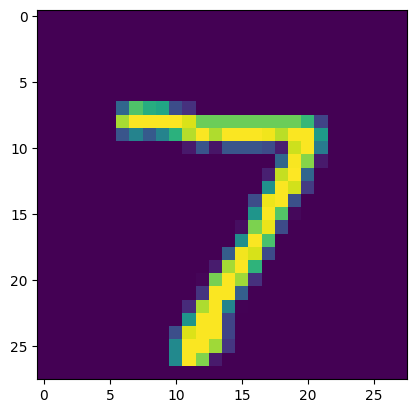

In [21]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [26]:
print(Y_pred[0])

[1.4477411e-02 3.0804090e-06 2.7546287e-01 7.5564533e-01 1.8586090e-09
 4.6245269e-02 1.1676177e-07 9.9999738e-01 2.7271951e-02 2.3847446e-01]


In [27]:
#converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [28]:
# converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [29]:
print(Y_pred)

[[1.4477411e-02 3.0804090e-06 2.7546287e-01 ... 9.9999738e-01
  2.7271951e-02 2.3847446e-01]
 [7.8941410e-04 1.9431007e-01 9.9999994e-01 ... 1.6193127e-09
  1.2194093e-05 1.4098298e-07]
 [2.1931715e-03 9.9981159e-01 6.8902642e-01 ... 7.7620655e-01
  7.8735459e-01 2.0589464e-04]
 ...
 [1.9257438e-06 3.3137775e-09 4.1167974e-04 ... 9.9199039e-01
  2.4548050e-02 9.9906266e-01]
 [6.0032608e-06 1.1300485e-06 1.3087234e-08 ... 4.9556387e-05
  1.7281385e-01 1.4238255e-05]
 [1.2124783e-01 3.0781397e-10 2.0413173e-03 ... 3.2293893e-11
  3.9450911e-01 4.1259267e-05]]


Y_Test = true labels
Y_pred_labels = prediction labels

In [30]:
#confusion matrix

conf_mat = confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 961    1    1    0    0    0    5    0    1   11]
 [   0 1116    2    1    2    0    5    3    6    0]
 [   7    0  982    8    4    0    6   10   14    1]
 [   1    0    2  990    0    3    0    5    3    6]
 [   1    0    2    1  961    0    5    1    1   10]
 [   1    1    0   22    1  842   10    2    9    4]
 [   4    1    1    0    3    2  943    1    3    0]
 [   1    0    9    5    4    0    0  994    4   11]
 [   4    1    3   11    6    7    4    7  925    6]
 [   1    1    0    6   17    2    1    3    0  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

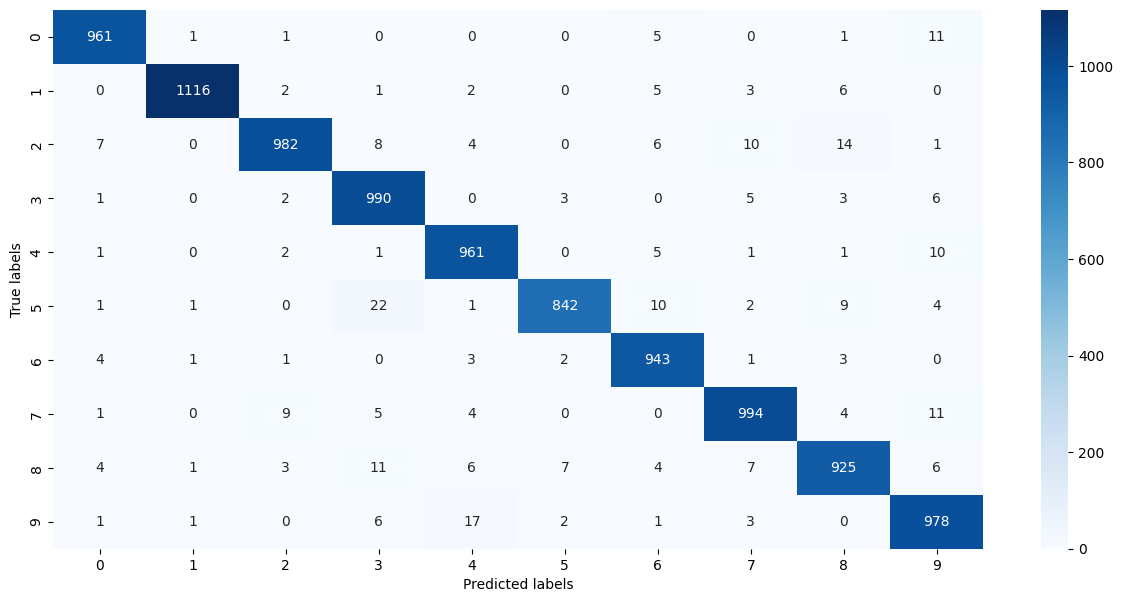

In [31]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot = True,fmt = 'd',cmap = "Blues")
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Building a Predictive System

In [32]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

In [34]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


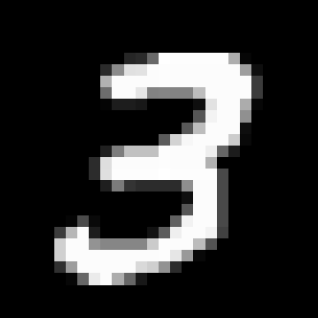

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(318, 318, 3)

In [37]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(318, 318)

In [39]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [40]:
input_image_resize.shape

(28, 28)

In [41]:
cv2_imshow(input_image_resize)

In [42]:
input_image_resize = input_image_resize/255

In [43]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [44]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[3.4014800e-08 2.2880181e-08 3.1082922e-01 1.0000000e+00 1.2083667e-12
  1.8311527e-02 1.5450171e-16 8.7021268e-05 7.2197668e-02 6.6873407e-01]]


In [45]:
input_pred_label = np.argmax(input_prediction)

In [46]:
print(input_pred_label)

3


 **Complete predictive system**

Enter the path of the image to be predicted: /content/MNIST_digit.png


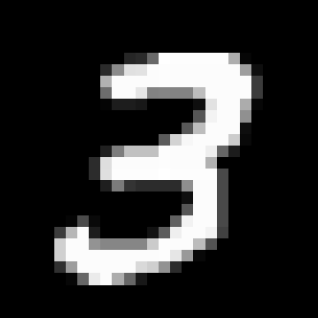

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Handwritten digit is: 3


In [49]:
input_image_path = input('Enter the path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('Handwritten digit is:',input_pred_label)
